In [25]:
import pandas as pd # import pandas package under shorthand "pd"
import matplotlib.pyplot as plt # import matplotlib.pyplot as "plt" for plotting and visualization
import seaborn as sns  # seaborn for creating correlation heatmap visualization

from sklearn.preprocessing import StandardScaler # class to scale features to zero mean and unit variance
from sklearn.model_selection import train_test_split # function to split data into training and test sets

from sklearn.metrics import mean_squared_error # function to calculate mean squared error
from sklearn.linear_model import LinearRegression # class providing Linear Regression with ordinary squared error loss
from sklearn.feature_selection import RFE # Recursive Feature Elimination for selecting important features
from sklearn.ensemble import RandomForestRegressor # Random Forest Regressor
from sklearn.tree import DecisionTreeRegressor # Single Decision Tree Regressor
from sklearn import tree # Decision tree visualization

In [18]:
df = pd.read_csv('data/student_exam_scores.csv')

df = df.drop(['student_id'], axis = 1)

studies = df['hours_studied'].to_numpy()
sleep = df['sleep_hours'].to_numpy()
attendance = df['attendance_percent'].to_numpy()
previous = df['previous_scores'].to_numpy()
score = df['exam_score'].to_numpy()
df.head(5)

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,8.0,8.8,72.1,45,30.2
1,1.3,8.6,60.7,55,25.0
2,4.0,8.2,73.7,86,35.8
3,3.5,4.8,95.1,66,34.0
4,9.1,6.4,89.8,71,40.3


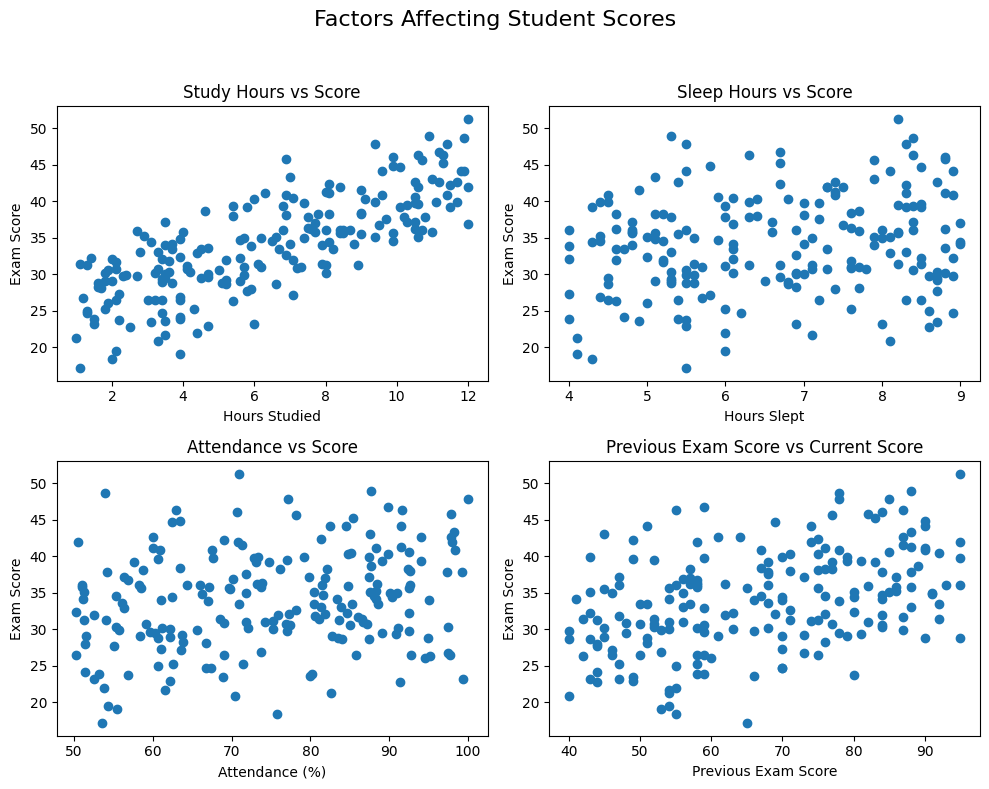

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Top-left
axs[0, 0].scatter(studies, score)
axs[0, 0].set_title('Study Hours vs Score')
axs[0, 0].set_xlabel('Hours Studied')
axs[0, 0].set_ylabel('Exam Score')

# Top-right
axs[0, 1].scatter(sleep, score)
axs[0, 1].set_title('Sleep Hours vs Score')
axs[0, 1].set_xlabel('Hours Slept')
axs[0, 1].set_ylabel('Exam Score')

# Bottom-left
axs[1, 0].scatter(attendance, score)
axs[1, 0].set_title('Attendance vs Score')
axs[1, 0].set_xlabel('Attendance (%)')
axs[1, 0].set_ylabel('Exam Score')

# Bottom-right
axs[1, 1].scatter(previous, score)
axs[1, 1].set_title('Previous Exam Score vs Current Score')
axs[1, 1].set_xlabel('Previous Exam Score')
axs[1, 1].set_ylabel('Exam Score')

# General title for the whole figure
fig.suptitle('Factors Affecting Student Scores', fontsize=16)

# Improve spacing so suptitle doesn't overlap subplots
fig.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

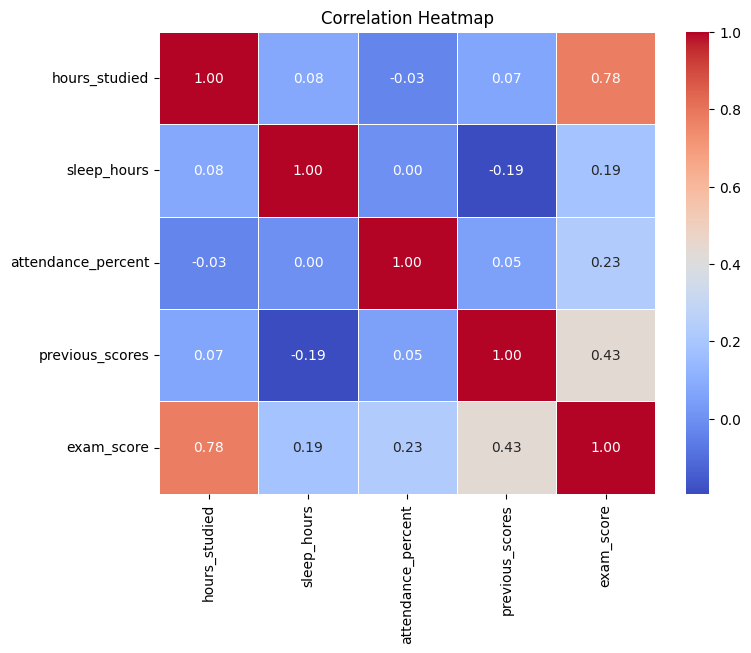

In [20]:
# Compute correlation matrix
matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

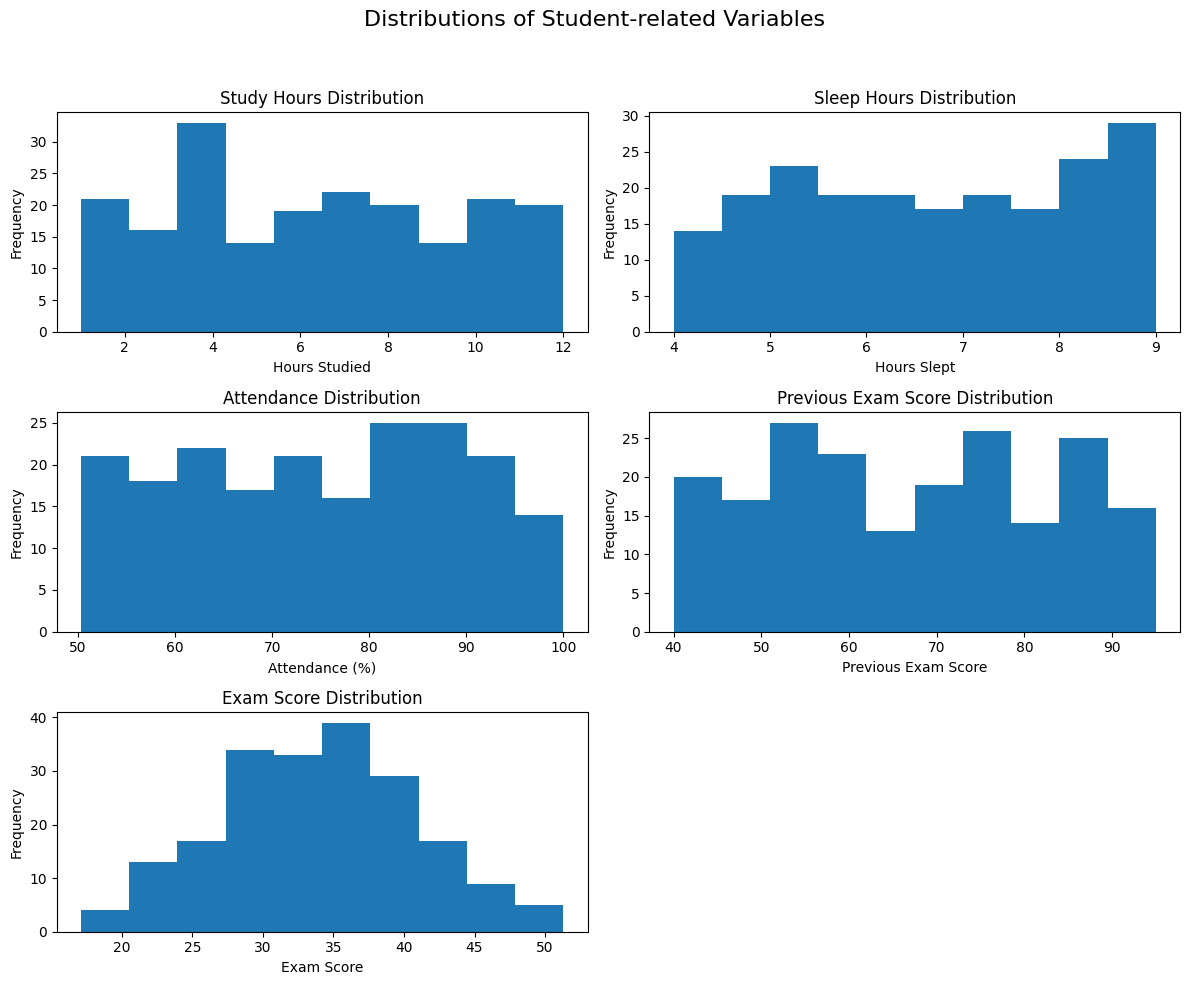

In [21]:
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# Top-left histogram
axs[0, 0].hist(studies)
axs[0, 0].set_title('Study Hours Distribution')
axs[0, 0].set_xlabel('Hours Studied')
axs[0, 0].set_ylabel('Frequency')

# Top-right histogram
axs[0, 1].hist(sleep)
axs[0, 1].set_title('Sleep Hours Distribution')
axs[0, 1].set_xlabel('Hours Slept')
axs[0, 1].set_ylabel('Frequency')

# Middle-left histogram
axs[1, 0].hist(attendance)
axs[1, 0].set_title('Attendance Distribution')
axs[1, 0].set_xlabel('Attendance (%)')
axs[1, 0].set_ylabel('Frequency')

# Middle-right histogram
axs[1, 1].hist(previous)
axs[1, 1].set_title('Previous Exam Score Distribution')
axs[1, 1].set_xlabel('Previous Exam Score')
axs[1, 1].set_ylabel('Frequency')

# Bottom-left: the 5th histogram (added from your separate figure)
axs[2, 0].hist(score)
axs[2, 0].set_title('Exam Score Distribution')
axs[2, 0].set_xlabel('Exam Score')
axs[2, 0].set_ylabel('Frequency')

# Bottom-right is unused (turn it off)
axs[2, 1].axis('off')

# General title for the whole figure
fig.suptitle('Distributions of Student-related Variables', fontsize=16)

# Adjust layout so suptitle doesn't overlap subplots
fig.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

In [22]:
# Defining feature matrix and label vector 
features = df.drop(['exam_score'], axis = 1)
X = features
y = df['exam_score']
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
# Preprocessing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

# Saving preprocessed data for visualization/inspection (not for training)
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['exam_score'] = y.values
df_scaled.to_csv('data/preprocessed_student_exam_scores_full.csv', index=False)

In [27]:
# Regression without sleep hours

X_scaled_no_sleep = X_scaled[:, [i for i, c in enumerate(X.columns) if c != 'sleep_hours']]

X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(
    X_scaled_no_sleep, y, test_size=0.3, random_state=101
)

regr_no_sleep = LinearRegression()
regr_no_sleep.fit(X_train_ns, y_train_ns)

y_pred_train_ns = regr_no_sleep.predict(X_train_ns)
y_pred_test_ns = regr_no_sleep.predict(X_test_ns)
train_mse_ns = mean_squared_error(y_train_ns, y_pred_train_ns)
test_mse_ns = mean_squared_error(y_test_ns, y_pred_test_ns)

print("Linear Regression without sleep_hours, scaled:")
print("wi =", regr_no_sleep.coef_)
print("w0 =", regr_no_sleep.intercept_)
print("training error:", train_mse_ns)
print("testing error:", test_mse_ns)
print("score:", regr_no_sleep.score(X_scaled_no_sleep, y))

Linear Regression without sleep_hours, scaled:
wi = [5.3035477  1.84293771 2.47591432]
w0 = 34.04714285714286
training error: 9.418785701310698
testing error: 8.964939442435993
score: 0.7976206053712727


In [28]:
# Full Linear Regression
regr = LinearRegression()
regr.fit(X_train_scaled, y_train)

y_pred_test = regr.predict(X_test_scaled)
y_pred_train = regr.predict(X_train_scaled)
test_error_full = mean_squared_error(y_test, y_pred_test)
tr_error_full = mean_squared_error(y_train, y_pred_train)
print("wi = ", regr.coef_)
print("w0 = ",regr.intercept_)
print("testing error:", test_error_full)
print("training error:", tr_error_full)
print("score:", regr.score(X_scaled, y))

wi =  [5.14351748 1.4215452  1.73336793 2.76971234]
w0 =  34.04714285714286
testing error: 6.856920813139474
training error: 7.514911486429592
score: 0.8404639827144931


In [29]:
# Decision Tree
dt = DecisionTreeRegressor(max_depth = 3)
dt.fit(X_train, y_train)
y_test_pred  = dt.predict(X_test)
test_mse  = mean_squared_error(y_test, y_test_pred)
test_sse = test_mse * len(y_test)

print("Decision Tree MSE")
print(f"Test MSE: {test_mse:.4f}, Test SSE: {test_sse:.4f}")

Decision Tree MSE
Test MSE: 14.9053, Test SSE: 894.3181


In [30]:
# Recursive Feature Elimination
rfe = RFE(LinearRegression(), n_features_to_select=1)
rfe.fit(X_train, y_train)

rfe_scaled = RFE(LinearRegression(), n_features_to_select=1)
rfe_scaled.fit(X_train_scaled, y_train)

print("RFE Feature ranking:", rfe.ranking_)
print("RFE Feature ranking (scaled):", rfe_scaled.ranking_)

RFE Feature ranking: [1 2 4 3]
RFE Feature ranking (scaled): [1 4 3 2]


In [31]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators = 100, random_state=42) # for reproducibility
rf.fit(X_train, y_train)

print("RF feature importance:", rf.feature_importances_)

y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest MSE on test set:", mse_rf)

RF feature importance: [0.66031732 0.07259674 0.09531587 0.17177007]
Random Forest MSE on test set: 9.673760600000012


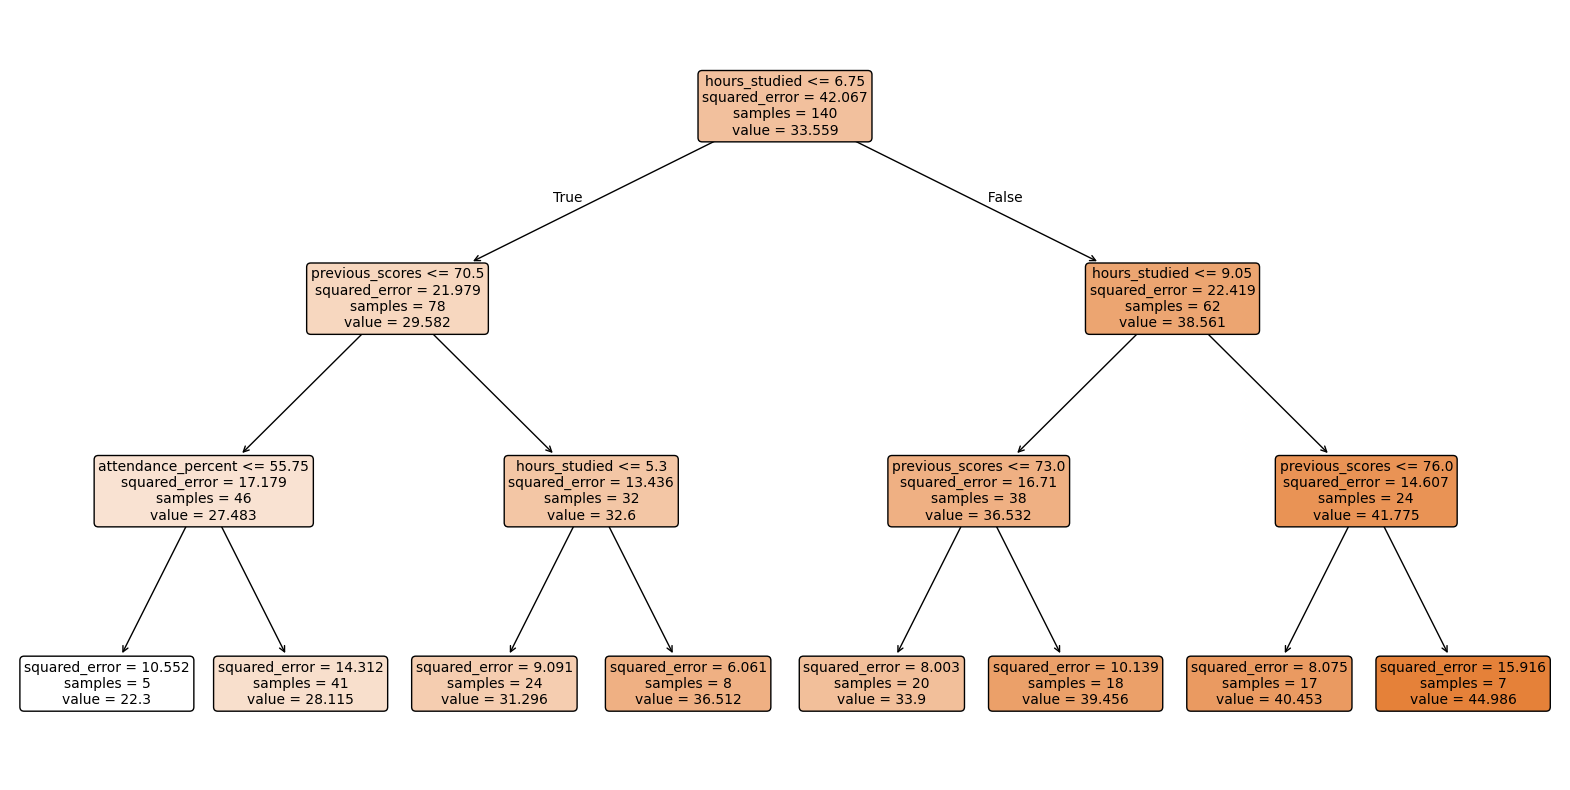

In [32]:
# Plotting the tree (splitting data with random_state=42 for the reproducibility of the report)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt = DecisionTreeRegressor(max_depth = 3)
dt.fit(X_train, y_train)
y_test_pred  = dt.predict(X_test)
plt.figure(figsize=(20, 10))
tree.plot_tree(dt,
               feature_names=X_train.columns,
               filled=True,
               rounded=True,
               fontsize=10)
plt.show()

In [33]:
# Visualizing
r = tree.export_text(dt, feature_names=list(X_train.columns))
print(r)

|--- hours_studied <= 6.75
|   |--- previous_scores <= 70.50
|   |   |--- attendance_percent <= 55.75
|   |   |   |--- value: [22.30]
|   |   |--- attendance_percent >  55.75
|   |   |   |--- value: [28.11]
|   |--- previous_scores >  70.50
|   |   |--- hours_studied <= 5.30
|   |   |   |--- value: [31.30]
|   |   |--- hours_studied >  5.30
|   |   |   |--- value: [36.51]
|--- hours_studied >  6.75
|   |--- hours_studied <= 9.05
|   |   |--- previous_scores <= 73.00
|   |   |   |--- value: [33.90]
|   |   |--- previous_scores >  73.00
|   |   |   |--- value: [39.46]
|   |--- hours_studied >  9.05
|   |   |--- previous_scores <= 76.00
|   |   |   |--- value: [40.45]
|   |   |--- previous_scores >  76.00
|   |   |   |--- value: [44.99]

